In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import missingno as msno

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset
data=pd.read_csv("hotel booking.csv")

In [3]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:

print(data.shape)


(119390, 32)


In [5]:
# Data Cleaning
data.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

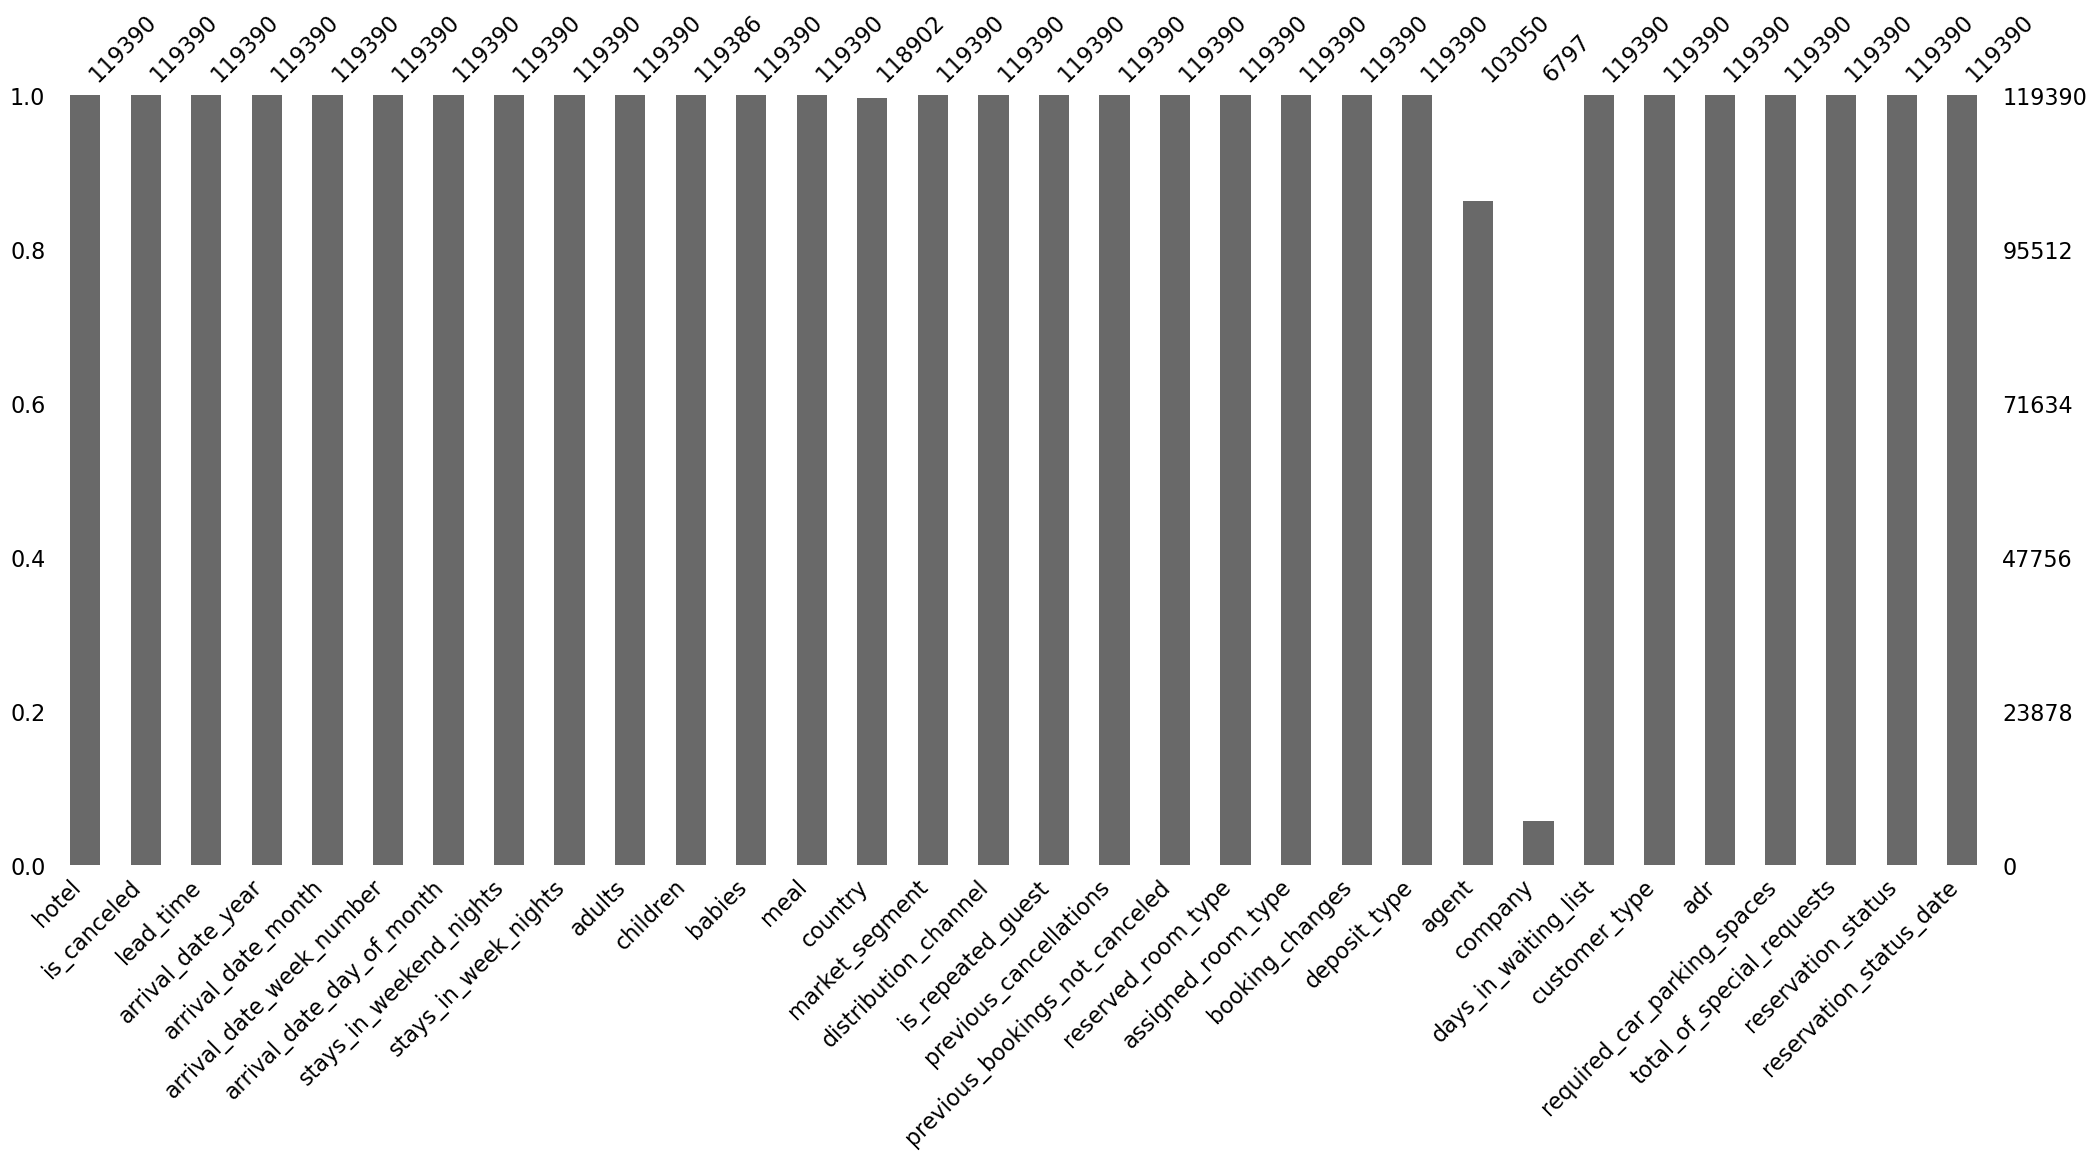

In [6]:
msno.bar(data)
plt.show()

In [7]:
# # Sort the correlation matrix in descending order
# cor1 =data.corr()['is_canceled'].sort_values(ascending=False)
# print(cor1)


In [8]:
correlation = data.corr()[['is_canceled']]
correlation

,is_canceled
is_canceled,1.000000
lead_time,0.293123
arrival_date_year,0.016660
arrival_date_week_number,0.008148
arrival_date_day_of_month,-0.006130
stays_in_weekend_nights,-0.001791
stays_in_week_nights,0.024765
adults,0.060017
children,0.005048
babies,-0.032491


In [9]:
positive_correlation = correlation[correlation['is_canceled'] > 0]

In [10]:
negative_correlation = correlation[correlation['is_canceled'] < 0]

In [11]:
sorted_negative_correlation = negative_correlation.sort_values(by='is_canceled',ascending=False)
n_cor=pd.DataFrame(sorted_negative_correlation)
n_cor

,is_canceled
stays_in_weekend_nights,-0.001791
arrival_date_day_of_month,-0.006130
company,-0.020642
babies,-0.032491
previous_bookings_not_canceled,-0.057358
agent,-0.083114
is_repeated_guest,-0.084793
booking_changes,-0.144381
required_car_parking_spaces,-0.195498
total_of_special_requests,-0.234658


In [12]:
sorted_positive_correlation = positive_correlation.sort_values(by='is_canceled')
p_cor=pd.DataFrame(sorted_positive_correlation)
p_cor

,is_canceled
children,0.005048
arrival_date_week_number,0.008148
arrival_date_year,0.016660
stays_in_week_nights,0.024765
adr,0.047557
days_in_waiting_list,0.054186
adults,0.060017
previous_cancellations,0.110133
lead_time,0.293123
is_canceled,1.000000


In [13]:
data["children"]=data["children"].fillna(data["children"].mean())
data=data.drop(['company', 'reservation_status_date', 'reservation_status', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_year', 'agent', 'arrival_date_week_number'], axis=1)


In [14]:
data.shape

(119390, 24)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


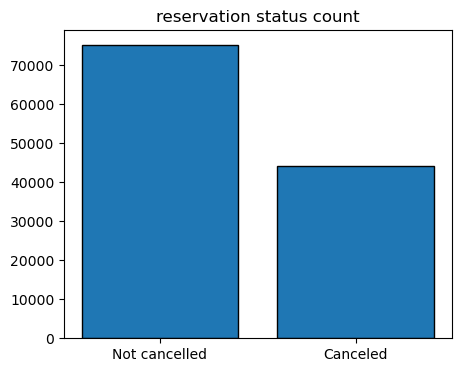

In [15]:
cancelled_prec=data["is_canceled"].value_counts(normalize=True)
print(cancelled_prec)

plt.figure(figsize=(5,4))
plt.title("reservation status count")
plt.bar(["Not cancelled","Canceled"],data["is_canceled"].value_counts(),edgecolor="black")
plt.show()

In [16]:
# Data Preprocessing
le1 = LabelEncoder()
data["hotel"]=le1.fit_transform(data["hotel"])
le2=LabelEncoder()
data["meal"]=le2.fit_transform(data["meal"])
le3=LabelEncoder()
data["country"]=le3.fit_transform(data["country"])
le4=LabelEncoder()
data["market_segment"]=le4.fit_transform(data["market_segment"])
le5=LabelEncoder()
data["distribution_channel"]=le5.fit_transform(data["distribution_channel"])
le6=LabelEncoder()
data["reserved_room_type"]=le6.fit_transform(data["reserved_room_type"])
le7=LabelEncoder()
data["assigned_room_type"]=le7.fit_transform(data["assigned_room_type"])
le8=LabelEncoder() 
data["deposit_type"]=le8.fit_transform(data["deposit_type"])
le9=LabelEncoder()
data["customer_type"]=le9.fit_transform(data["customer_type"])

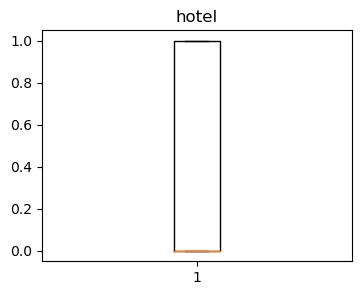

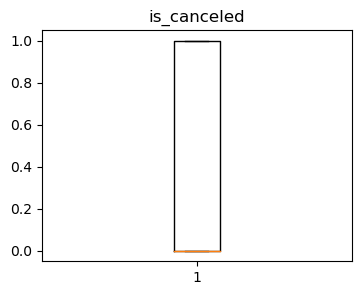

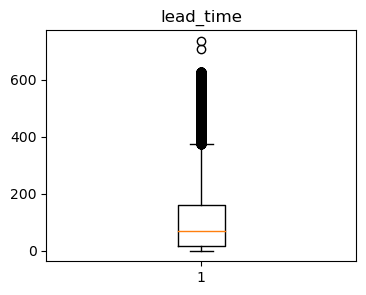

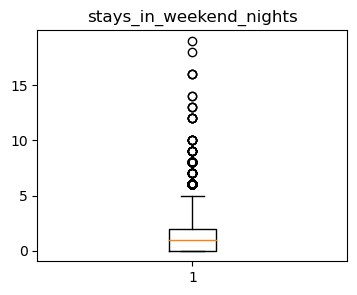

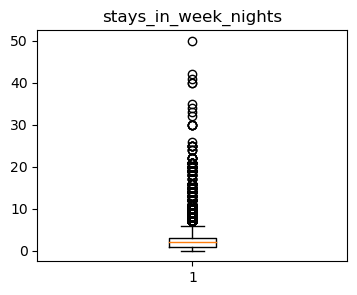

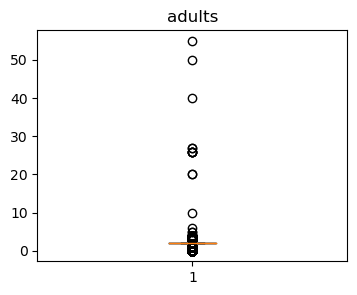

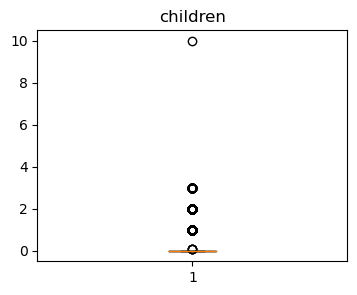

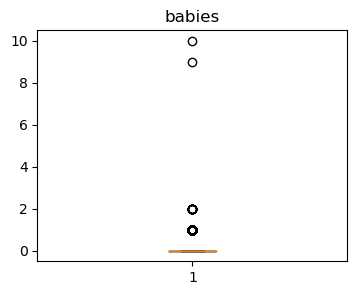

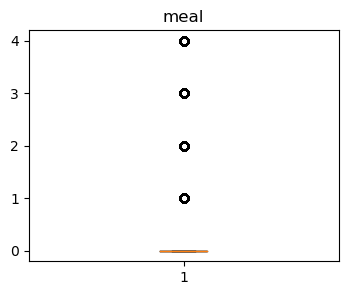

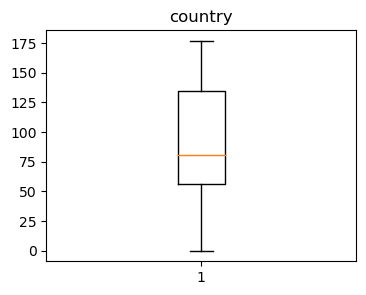

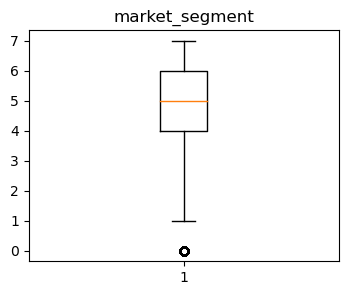

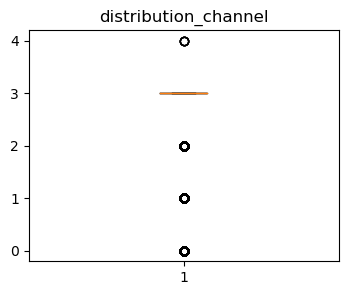

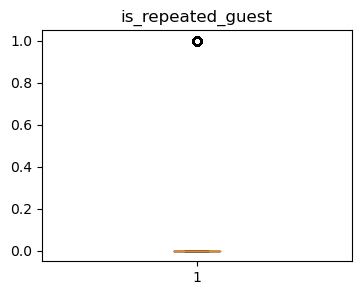

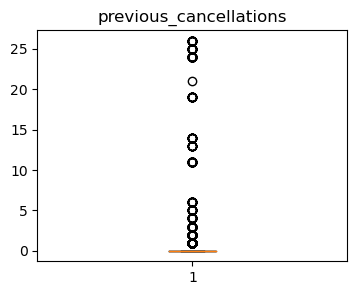

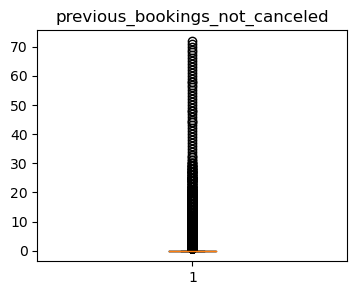

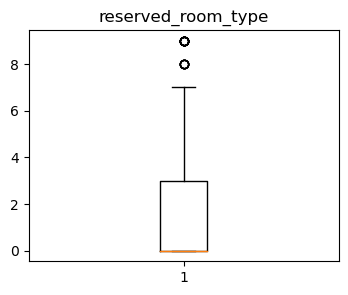

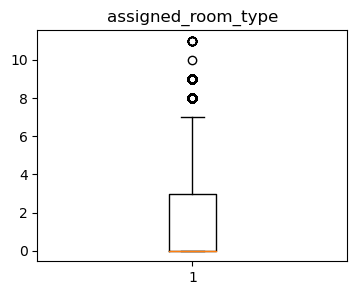

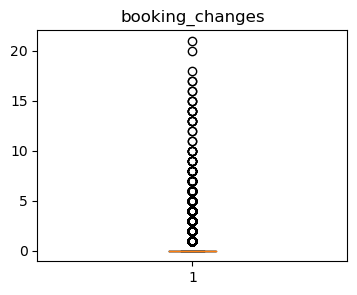

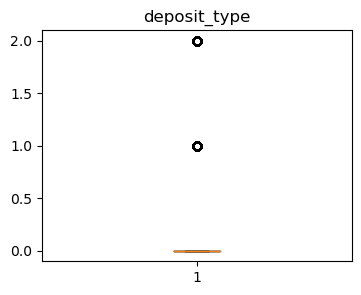

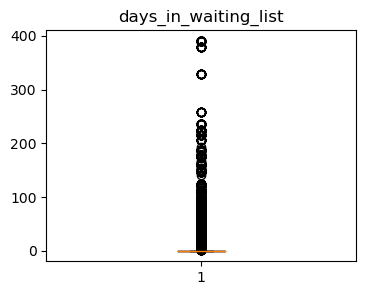

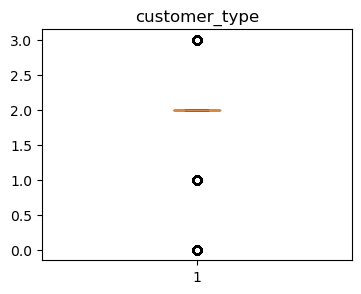

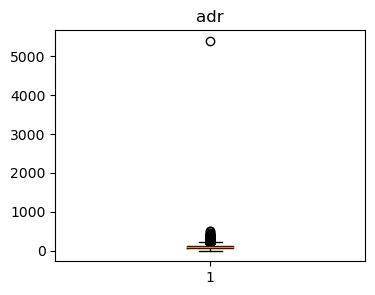

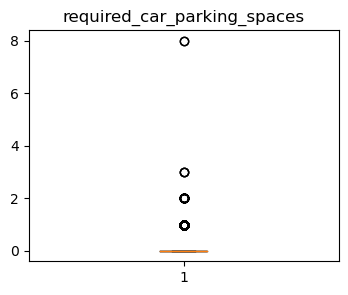

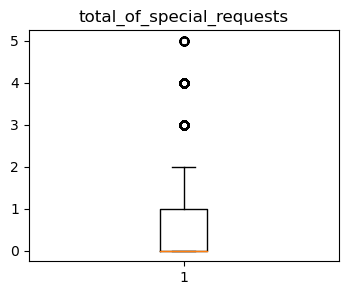

In [17]:
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize =(4, 3))
    plt.boxplot(data[column].dropna())
    plt.title(column)
    plt.show()

In [18]:
# Remove outliers using Z-score method
from scipy import stats
z_scores = stats.zscore(data._get_numeric_data())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [19]:
data.shape

(89886, 24)

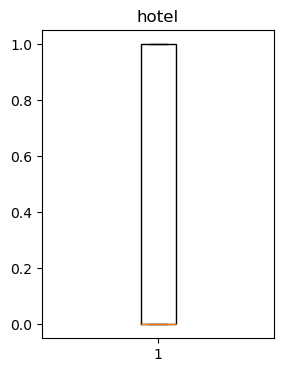

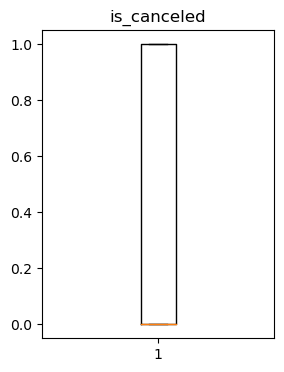

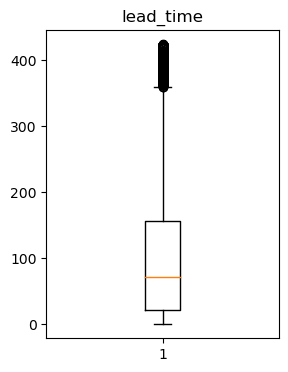

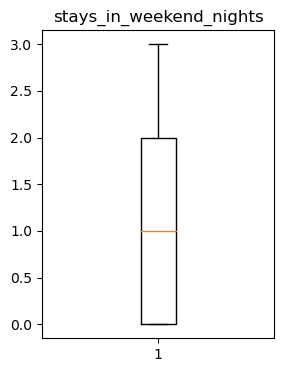

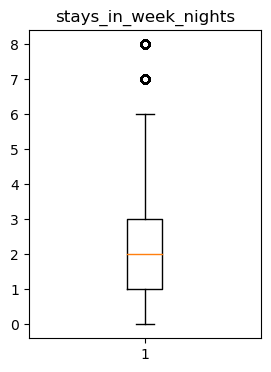

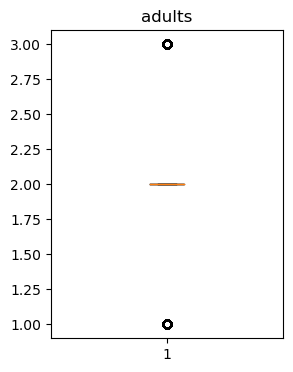

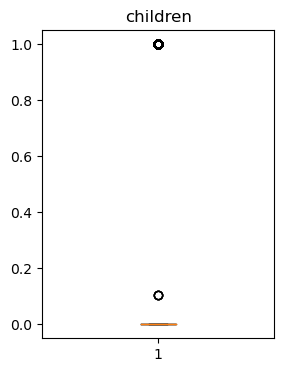

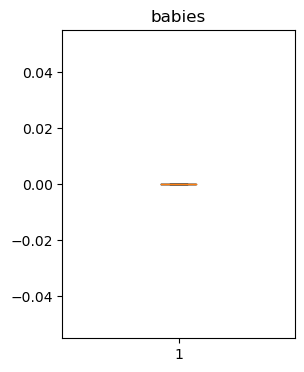

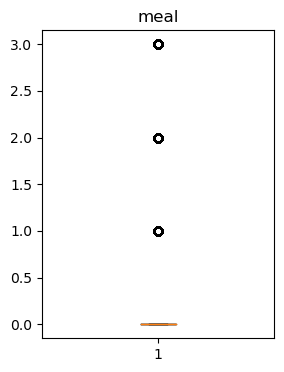

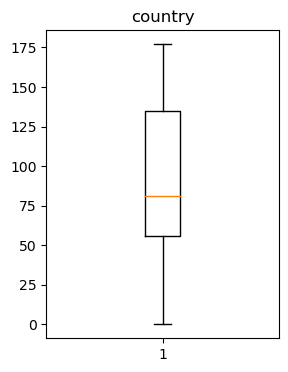

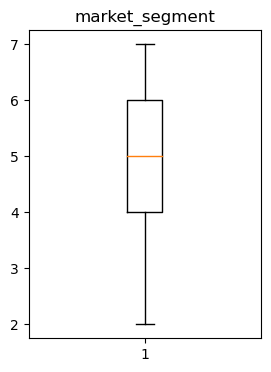

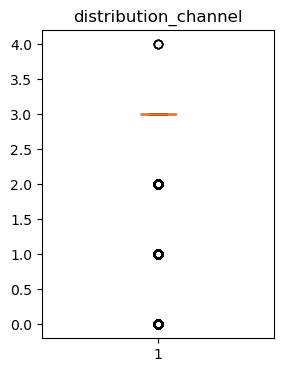

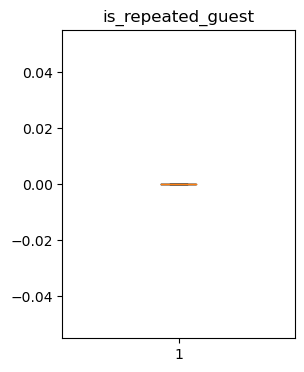

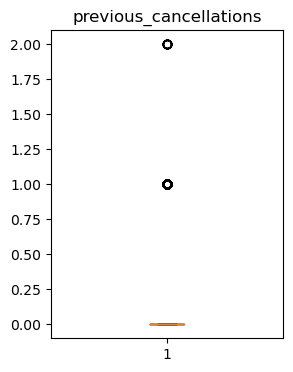

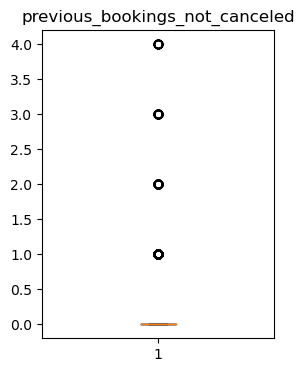

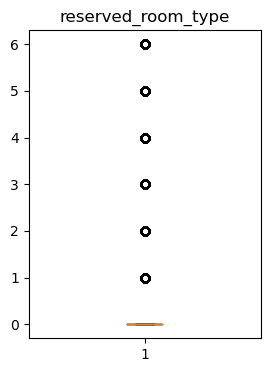

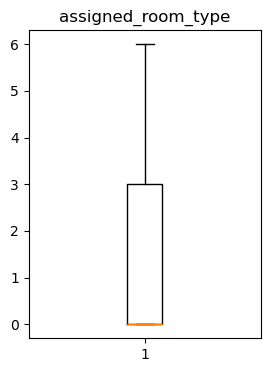

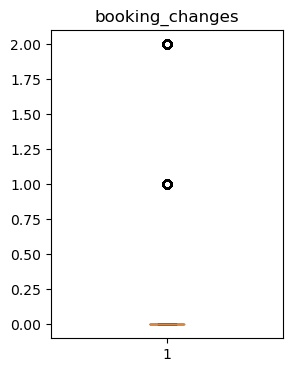

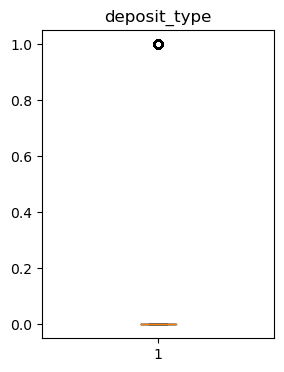

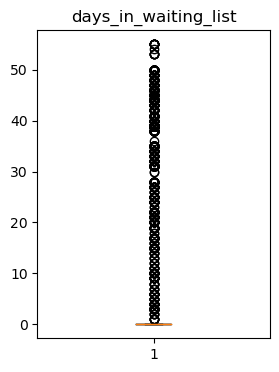

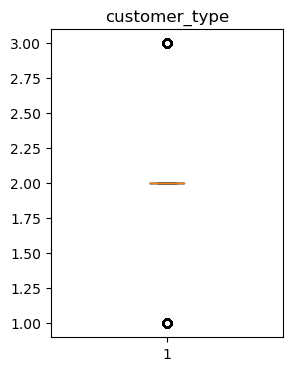

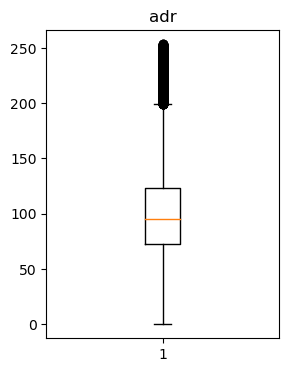

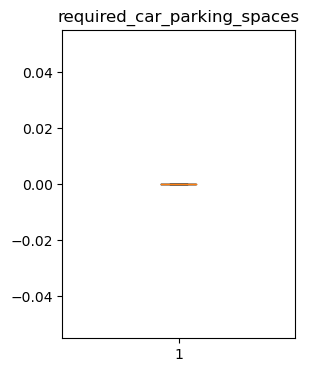

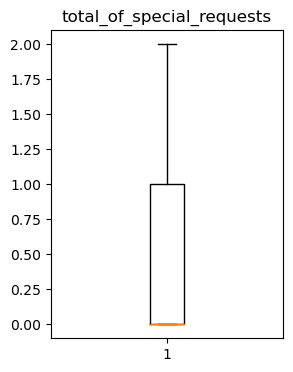

In [20]:
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize =(3,4))
    plt.boxplot(data[column].dropna())
    plt.title(column)
    plt.show()

In [21]:
# Splitting the data
x = data.drop('is_canceled', axis=1)
y = data['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
model_params = {
    'logistic_regression': {'model': LogisticRegression(), 'params': {'C': [0.1, 1, 10]}},
    'decision_tree': {'model': DecisionTreeClassifier(), 'params': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10]}},
    'random_forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [1, 5, 10]}}
}


In [23]:
# Model Training and Hyperparameter Tuning
scores = []
models = ['logistic_regression', 'decision_tree','random_forest']

for model_name in models:
    mp = model_params[model_name]
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, error_score='raise')
    clf.fit(x_train, y_train)
    scores.append({'model': model_name, 'best_score': clf.best_score_, 'best_params': clf.best_params_})

In [24]:
# Print the results
df=pd.DataFrame(scores)
df

,model,best_score,best_params
0,logistic_regression,0.762850,{'C': 10}
1,decision_tree,0.821119,"{'criterion': 'entropy', 'max_depth': None}"
2,random_forest,0.850726,{'n_estimators': 10}


In [25]:
# Final Model Training
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
# Model Evaluation
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10539
           1       0.87      0.80      0.83      7439

    accuracy                           0.87     17978
   macro avg       0.87      0.86      0.86     17978
weighted avg       0.87      0.87      0.86     17978



In [29]:
# User input and prediction
Hotal_ = input("Enter the hotel type ['Resort Hotel','City Hotel']:\n")
Hotal_ = int(le1.transform([Hotal_]))
LeadTime_=int(input("enter lead time: \n"))
stays_in_weekend_nights_=int(input("enter stays_in_weekend_nights: \n"))
stays_in_week_nights_=int(input("enter stays_in_week_nights: \n"))
adults_=int(input("enter the number of adults: \n"))
children_=int(input("enter the number of children \n"))
babies_=int(input("enter the number of babies \n"))
meal_=input("enter meal [SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)]:   \n")
meal_=int(le2.transform([meal_]))
country_=input("enter country['RUS', 'SWE', 'AUS','IND' ,'CHN', 'MEX']:  \n")
country_=int(le3.transform([country_]))
market_segment_=input("enter market segment ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Groups','Undefined','Aviation']:  \n")
market_segment_=int(le4.tra nsform([market_segment_]))
distribution_channel_=input("enter distribution channel['Direct','Corporate','TA/TO','GDS']:  \n")
distribution_channel_=int(le5.transform([distribution_channel_]))
is_repeated_guest_=int(input("enter :0 0if the guest Guest is new. 1: Guest has booked before  \n"))
previous_cancellations_=int(input(" enter the number of previous_cancellations  \n"))
previous_bookings_not_canceled_=int(input("How many past bookings were not canceled by the guest?:  \n"))
reserved_room_type_=input("enter reserved room type['C','A','D','E','G','F','H','L','P','B']:  \n")
reserved_room_type_=int(le6.transform([reserved_room_type_]))
assigned_room_type_=input("enter assigned_room_type ['C','A','D','E','G','F','I','B','H','P','L','K']  \n")
assigned_room_type_=int(le7.transform([assigned_room_type_]))
booking_changes_=int(input("booking_changes:  \n"))
deposit_type_=input("enter the deposit type ['No Deposit','Refundable','Non Refund'] \n")
deposit_type_=int(le8.transform([deposit_type_]))
days_in_waiting_list_=int(input("enter the day in waiting list:  \n"))
customer_type_=input("enter the customer type ['Transient','Contract','Transient-Party','Group']:   \n")
customer_type_=int(le9.transform([customer_type_]))
adr_=float(input("enter Average Daily Rate:   \n"))
required_car_parking_spaces_=int(input("enter required car parking space:  \n"))
total_of_special_requests_=int(input("enter total of special requests:  \n"))

Enter the hotel type ['Resort Hotel','City Hotel']:
Resort Hotel
enter lead time: 
2
enter stays_in_weekend_nights: 
2
enter stays_in_week_nights: 
2
enter the number of adults: 
2
enter the number of children 
1
enter the number of babies 
2
enter meal [SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)]:   
BB
enter country['RUS', 'SWE', 'AUS','IND' ,'CHN', 'MEX']:  
RUS
enter market segment ['Direct','Corporate','Online TA','Offline TA/TO','Complementary','Groups','Undefined','Aviation']:  
Direct
enter distribution channel['Direct','Corporate','TA/TO','GDS']:  
Direct
enter :0 0if the guest Guest is new. 1: Guest has booked before  
0
 enter the number of previous_cancellations  
0
How many past bookings were not canceled by the guest?:  
1
enter reserved room type['C','A','D','E','G','F','H','L','P','B']:  
C
enter assigned_room_type ['C','A','D','E','G','F','I','B','H','P','L',

In [30]:
a=model.predict([[Hotal_,LeadTime_,stays_in_weekend_nights_,stays_in_week_nights_,adults_,children_,babies_,meal_,country_,market_segment_,distribution_channel_,is_repeated_guest_,previous_cancellations_,
previous_bookings_not_canceled_,reserved_room_type_,assigned_room_type_,booking_changes_,deposit_type_,days_in_waiting_list_,customer_type_,adr_,required_car_parking_spaces_,total_of_special_requests_]])
 
if a == 1:
    print("the booking was canceled")
elif a== 0:
    print(" the booking was not canceled")

 the booking was not canceled
